In [5]:
import pandas as pd 
import numpy as np 

In [6]:
df=pd.read_csv('.\\ch2_scores_em.csv')
df

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76
5,6,48,60
6,7,65,81
7,8,49,66
8,9,65,78
9,10,58,82


In [7]:
english_score=np.array(df['english'])
pd.Series(english_score).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [8]:
freq,_=np.histogram(english_score,bins=10,range=(0,100))
print(freq, "계급 내 도수")
print(_,"계급")

[ 0  0  0  2  8 16 18  6  0  0] 계급 내 도수
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.] 계급


In [9]:
freq_class=[f'{i}~{i+10}' for i in range(0,100,10)]
freq_dist_df=pd.DataFrame({'frequency':freq},
                            index=pd.Index(freq_class,name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [10]:
#계급값
class_value=[(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [11]:

# 상대 도수
rel_freq=freq/freq.sum()
# 누적 상대도수
cum_rel_freq=np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [12]:
freq_dist_df['class_value']=class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df

,frequency,class_value,relative frequency,cumulative relative frequency
class,,,,
0~10,0,5,0.00,0.00
10~20,0,15,0.00,0.00
20~30,0,25,0.00,0.00
30~40,2,35,0.04,0.04
40~50,8,45,0.16,0.20
50~60,16,55,0.32,0.52
60~70,18,65,0.36,0.88
70~80,6,75,0.12,1.00
80~90,0,85,0.00,1.00


In [13]:
#최빈값
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(),'class_value']

np.int64(65)

In [14]:
import matplotlib.pyplot as plt

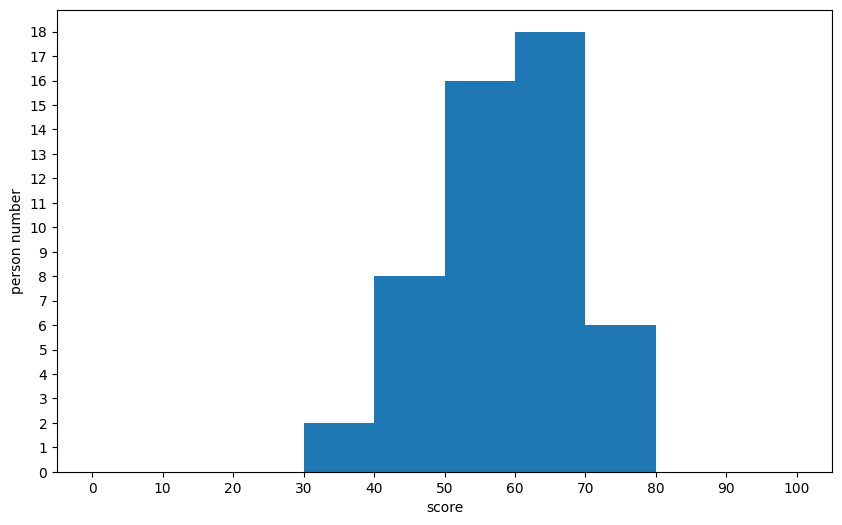

In [15]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

freq,_,_=ax.hist(english_score,bins=10,range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0,freq.max()+1))
plt.show()

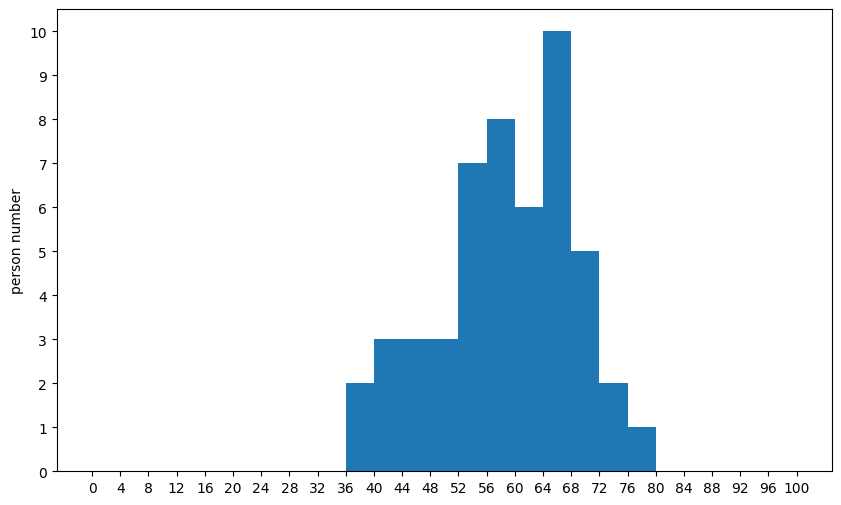

In [16]:
#계급수 10->25
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

freq,_,_=ax.hist(english_score,bins=25,range=(0,100))
ax.set_label('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100,25+1))
ax.set_yticks(np.arange(0,freq.max()+1))
plt.show()

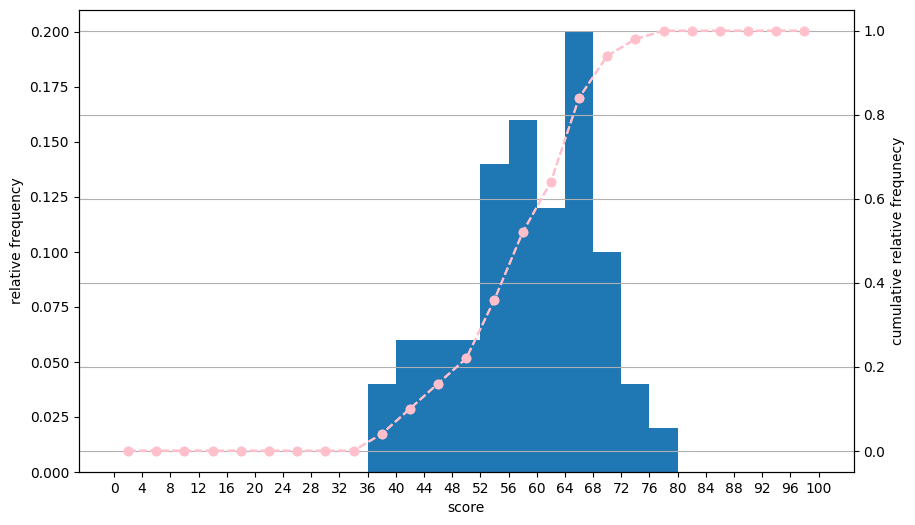

In [17]:
#상대도수 히스토그램
fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(111)
ax2=ax1.twinx()
# 상대 도수 -> 비율로 계산하기 위해 도수(빈도수)를 1/n 으로 나눠줌
weights = np.ones_like(english_score)/len(english_score)
rel_freq,_,_=ax1.hist(english_score,bins=25,range=(0,100),weights=weights)

cum_rel_freq=np.cumsum(rel_freq)
# 계급 중앙값
class_value=[(i+(i+4))//2 for i in range(0,100,4)]
ax2.plot(class_value,cum_rel_freq,ls='--',marker='o',color='pink')
cum_rel_freq=np.cumsum(rel_freq)
class_value=[(i+(i+4))//2 for i in range(0,100,4)]
ax2.plot(class_value,cum_rel_freq,ls='--',marker='o',color='pink')
ax2.grid()

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequnecy')
ax1.set_xticks(np.linspace(0,100,26))

plt.show()

Text(0, 0.5, 'ylabel')

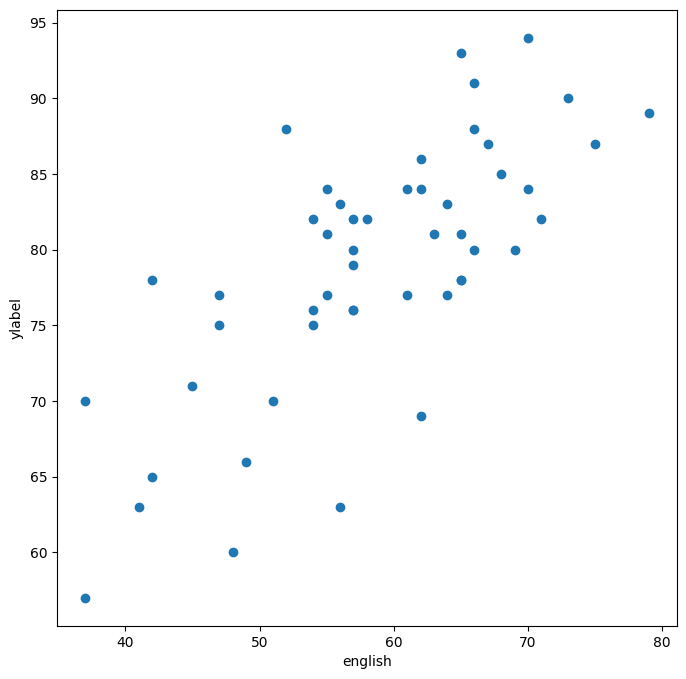

In [20]:
import numpy as np
english_score=np.array(df['english'])
math_score=np.array(df['mathematics'])

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)

ax.scatter(english_score,math_score)
ax.set_xlabel('english')
ax.set_ylabel('ylabel')

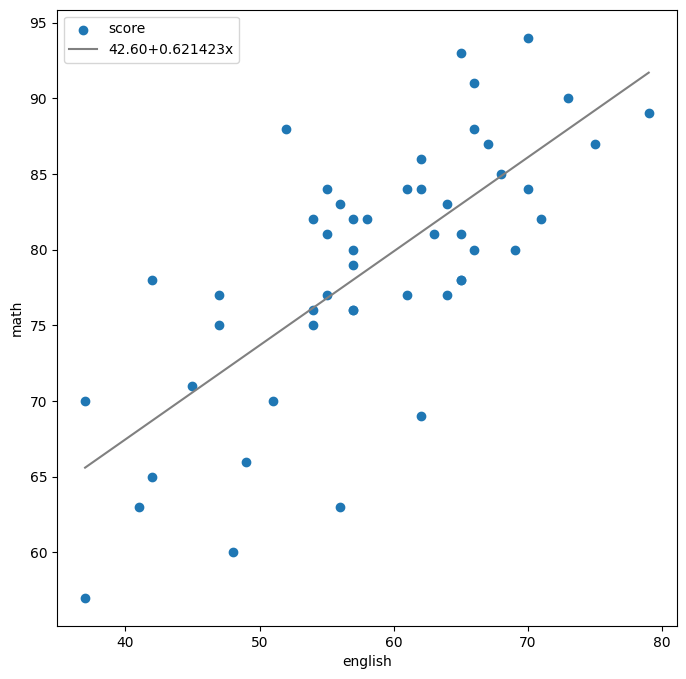

In [25]:
#회귀 직선 그리기
#선형계수
poly_fit=np.polyfit(english_score,math_score,1)
poly_1d=np.poly1d(poly_fit)
xs=np.linspace(english_score.min(),english_score.max())
ys=poly_1d(xs)

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.scatter(english_score,math_score,label='score')
ax.plot(xs,ys,color='gray',label=f'{poly_fit[1]:.2f}+{poly_fit[0]:2f}x')
ax.set_xlabel('english')
ax.set_ylabel('math')
ax.legend(loc='upper left')

plt.show()